Import required libraries

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer

Load the dataset

In [2]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
display(X.head())
y = pd.Series(data.target, name='target')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Split the data into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Decision Tree with random state 0

In [4]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

print("Training accuracy:", dt.score(X_train, y_train))
print("Testing accuracy:", dt.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 0.8811188811188811


Plot the decision tree with random state 0

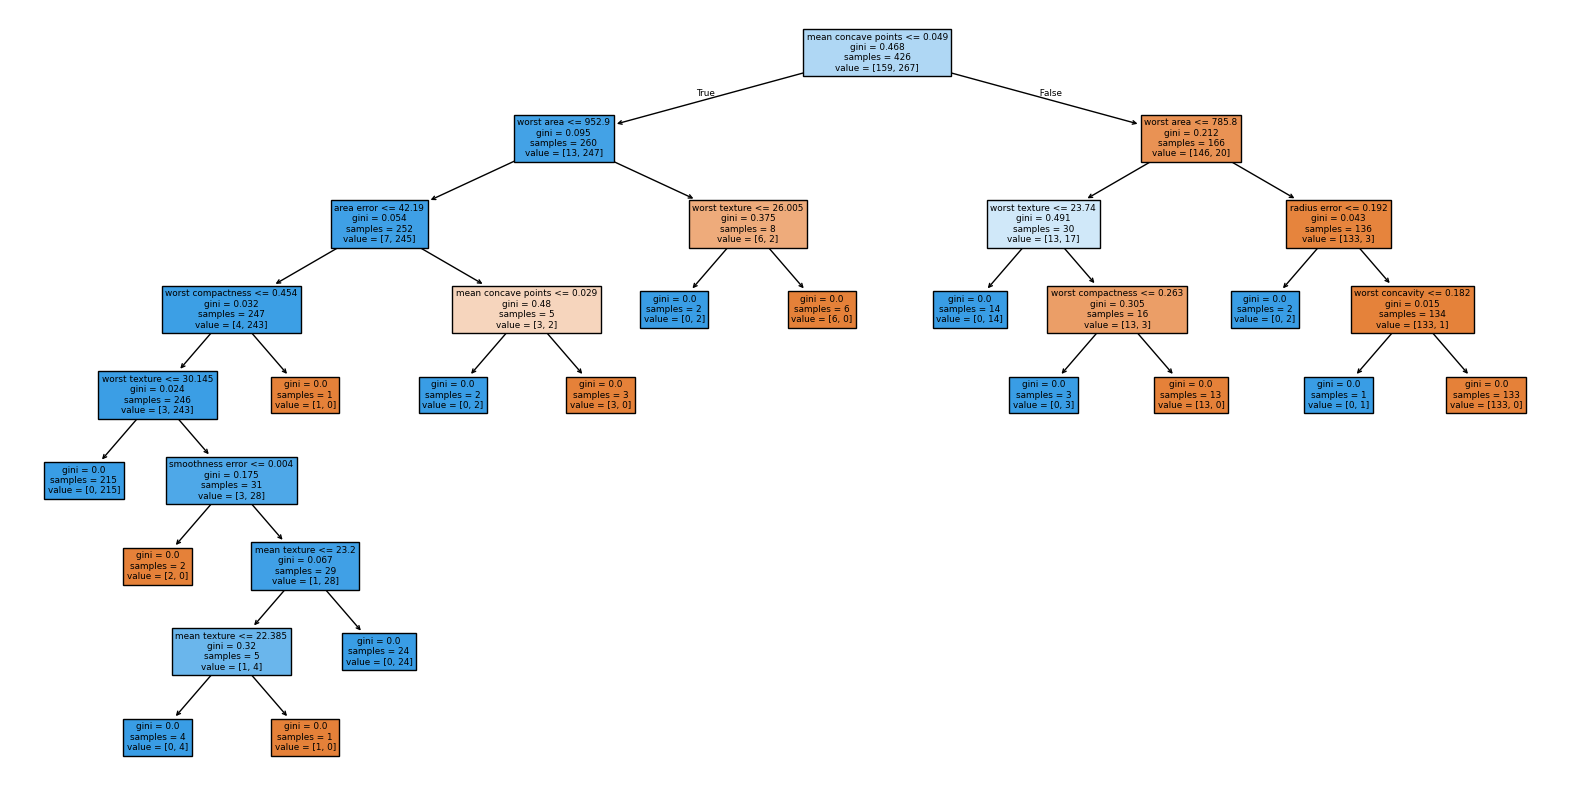

Max depth of the Dtree: 8
Number of nodes in the Dtree: 16


In [5]:
plt.figure(figsize=(20, 10))
plt.title("Decision Tree with Random State 0")
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()

print('Max depth of the Dtree:', dt.get_depth())
print('Number of nodes in the Dtree:', dt.get_n_leaves())

Prunning of the tree using cross-validation

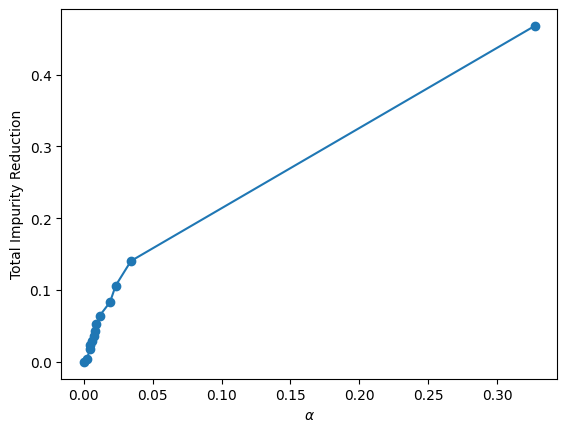

In [6]:
# Get the effective alphas and the corresponding tree nodes
path = dt.cost_complexity_pruning_path(X_train, y_train)
alphas, impurities = path.ccp_alphas, path.impurities

# plot the alpha vs impurity graph
plt.plot(alphas, impurities, marker='o')
plt.xlabel(r'$\alpha$')
plt.ylabel('Total Impurity Reduction')
plt.show()

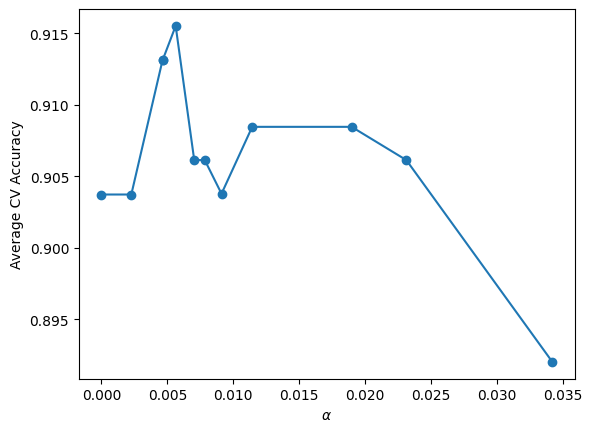

In [7]:
# calculate clfs for different alphas
clfs = []
for alpha in (np.unique(alphas)[:-1]):  # Exclude the last alpha
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Calculate average cross-validated accuracy for each alpha
cv_scores = [cross_val_score(clf, X_train, y_train, cv=5).mean() for clf in clfs]

# Plot the alpha vs accuracy graph
plt.plot(alphas[:-1], cv_scores, marker='o')
plt.xlabel(r'$\alpha$')
plt.ylabel('Average CV Accuracy')
plt.show()

Calculate the optimal alpha based on cross-validation accuracy

In [8]:
optimal_alpha = alphas[np.argmax(cv_scores)]
print("Optimal alpha:", optimal_alpha)

Optimal alpha: 0.005633802816901408


Best pruned decision tree

Training accuracy: 0.9835680751173709
Testing accuracy: 0.916083916083916


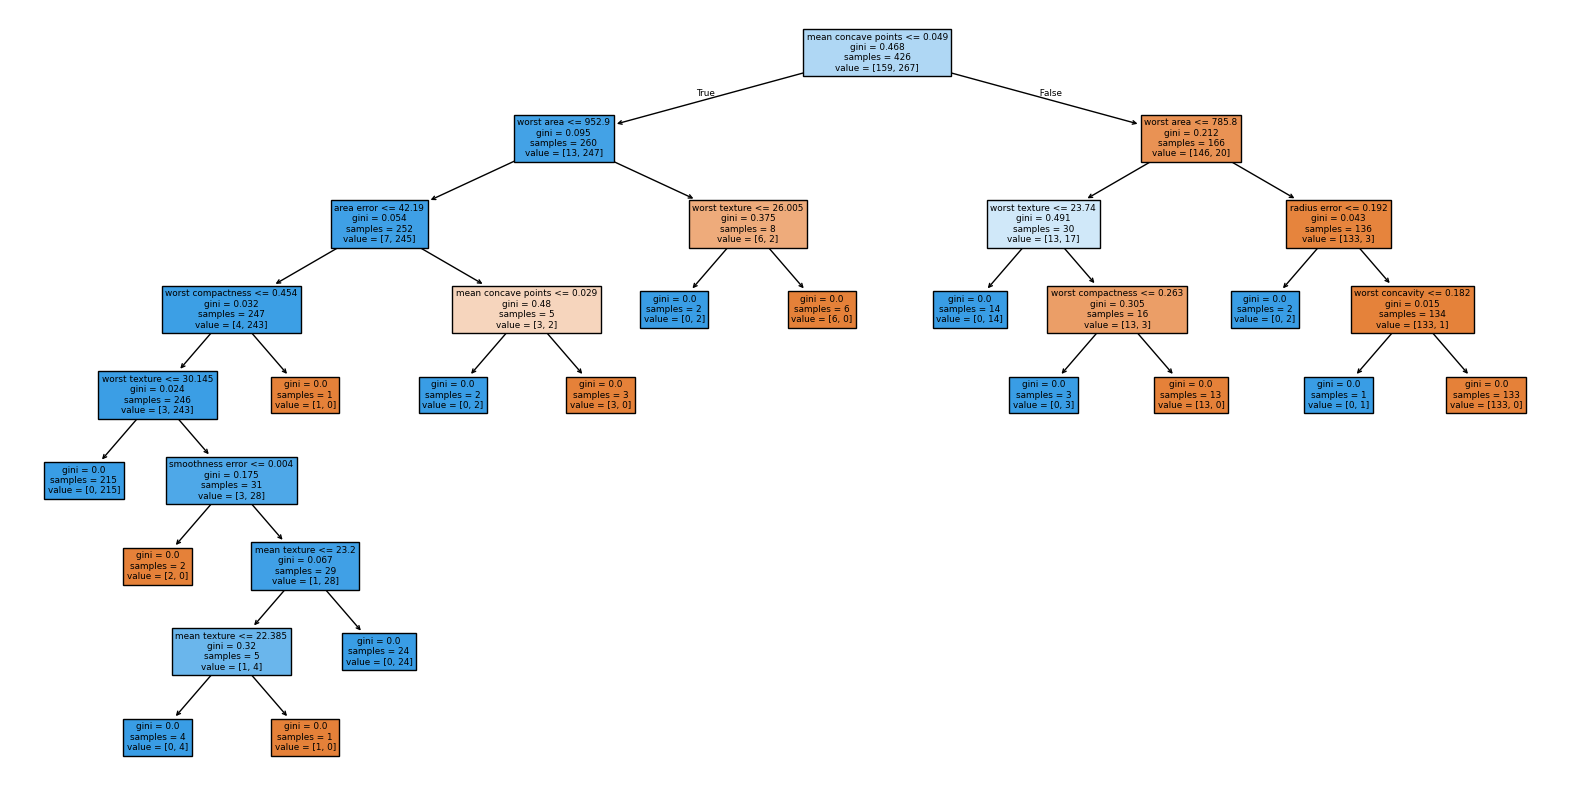

Max depth of the Dtree: 8
Number of nodes in the Dtree: 16


In [10]:
best_pruned_dtree = DecisionTreeClassifier(random_state=0, ccp_alpha=optimal_alpha)
best_pruned_dtree.fit(X_train, y_train)

print("Training accuracy:", best_pruned_dtree.score(X_train, y_train))
print("Testing accuracy:", best_pruned_dtree.score(X_test, y_test))

plt.figure(figsize=(20, 10))
plt.title("Decision Tree with Random State 0")
plot_tree(dt, feature_names=X.columns, filled=True)
plt.show()

print('Max depth of the Dtree:', dt.get_depth())
print('Number of nodes in the Dtree:', dt.get_n_leaves())